In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
#Import the CSV File
beer_ratings_df = pd.read_csv("beer_profile_and_ratings.csv")
beer_ratings_df

,Name,Style,Brewery,Beer Name (Full),Description,ABV,Min IBU,Max IBU,Astringency,Body,...,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
0,Amber,Altbier,Alaskan Brewing Co.,Alaskan Brewing Co. Alaskan Amber,"Notes:Richly malty and long on the palate, wit...",5.3,25,50,13,32,...,33,57,8,111,3.498994,3.636821,3.556338,3.643863,3.847082,497
1,Double Bag,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Double Bag,"Notes:This malty, full-bodied double alt is al...",7.2,25,50,12,57,...,24,35,12,84,3.798337,3.846154,3.904366,4.024948,4.034304,481
2,Long Trail Ale,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Long Trail Ale,Notes:Long Trail Ale is a full-bodied amber al...,5.0,25,50,14,37,...,10,54,4,62,3.409814,3.667109,3.600796,3.631300,3.830239,377
3,Doppelsticke,Altbier,Uerige Obergärige Hausbrauerei GmbH / Zum Uerige,Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...,Notes:,8.5,25,50,13,55,...,49,40,16,119,4.148098,4.033967,4.150815,4.205163,4.005435,368
4,Sleigh'r Dark Doüble Alt Ale,Altbier,Ninkasi Brewing Company,Ninkasi Brewing Company Sleigh'r Dark Doüble A...,Notes:Called 'Dark Double Alt' on the label.Se...,7.2,25,50,25,51,...,11,51,20,95,3.625000,3.973958,3.734375,3.765625,3.817708,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192,Winter Shredder,Winter Warmer,Cisco Brewers Inc.,Cisco Brewers Inc. Winter Shredder,Notes:,8.8,35,50,15,37,...,23,45,67,74,4.125000,3.875000,3.875000,3.750000,4.000000,4
3193,The First Snow Ale,Winter Warmer,RJ Rockers Brewing Company,RJ Rockers Brewing Company First Snow Ale,Notes:This hearty American pale ale contains a...,6.0,35,50,15,31,...,54,14,140,58,3.950000,3.750000,3.760000,3.790000,3.730000,50
3194,Red Nose Winter Ale,Winter Warmer,Natty Greene's Pub & Brewing Co.,Natty Greene's Pub & Brewing Co. Red Nose Wint...,Notes:,6.8,35,50,8,44,...,26,21,96,77,3.576923,3.711538,3.596154,3.673077,3.711538,26
3195,Fish Tale Winterfish,Winter Warmer,Fish Brewing Company / Fishbowl Brewpub,Fish Brewing Company / Fishbowl Brewpub Fish T...,Notes:,7.5,35,50,11,36,...,81,110,18,73,3.902299,3.885057,3.862069,3.902299,3.879310,87


In [3]:
#Examine the data types
beer_ratings_df.dtypes

Name                  object
Style                 object
Brewery               object
Beer Name (Full)      object
Description           object
ABV                  float64
Min IBU                int64
Max IBU                int64
Astringency            int64
Body                   int64
Alcohol                int64
Bitter                 int64
Sweet                  int64
Sour                   int64
Salty                  int64
Fruits                 int64
Hoppy                  int64
Spices                 int64
Malty                  int64
review_aroma         float64
review_appearance    float64
review_palate        float64
review_taste         float64
review_overall       float64
number_of_reviews      int64
dtype: object

In [4]:
# Review all styles of beer in the CSV file
beer_ratings_df['Style'].unique()

array(['Altbier', 'Barleywine - American', 'Barleywine - English',
       'Bitter - English Extra Special / Strong Bitter (ESB)',
       'Bitter - English', 'Bière de Champagne / Bière Brut',
       'Blonde Ale - American', 'Blonde Ale - Belgian',
       'Bock - Doppelbock', 'Bock - Eisbock', 'Bock - Maibock',
       'Bock - Traditional', 'Bock - Weizenbock', 'Braggot', 'Brett Beer',
       'Brown Ale - American', 'Brown Ale - Belgian Dark',
       'Brown Ale - English', 'California Common / Steam Beer',
       'Chile Beer', 'Cream Ale', 'Dubbel',
       'Farmhouse Ale - Bière de Garde', 'Farmhouse Ale - Sahti',
       'Farmhouse Ale - Saison', 'Fruit and Field Beer',
       'Gruit / Ancient Herbed Ale', 'Happoshu', 'Herb and Spice Beer',
       'IPA - American', 'IPA - Belgian',
       'IPA - Black / Cascadian Dark Ale', 'IPA - English',
       'IPA - Imperial', 'IPA - New England', 'Kvass', 'Kölsch',
       'Lager - Adjunct', 'Lager - American Amber / Red',
       'Lager - American',

In [8]:
#What is the lowest possible rating?
beer_ratings_df['review_overall'].min()

1.136364

In [9]:
#What is the highest possible rating?
beer_ratings_df['review_overall'].max()

5.0

In [25]:
#Find the top rated beer
top_beer = beer_ratings_df.groupby('Style')['review_overall'].mean()
top_beer.sort_values(ascending=False).head()

Style
IPA - New England            4.435296
Wild Ale                     4.233521
Stout - American Imperial    4.178492
Lambic - Traditional         4.139164
IPA - Imperial               4.090109
Name: review_overall, dtype: float64

Text(0, 0.5, 'Astringency')

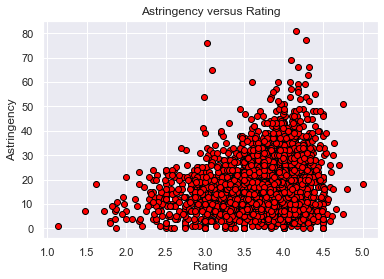

In [12]:
#Is there any correlation between astringency and overall rating? 
x = beer_ratings_df["review_overall"]
y = beer_ratings_df["Astringency"]
plt.scatter(x, y, marker="o", facecolors="red", edgecolors="black")
plt.title("Astringency versus Rating")
plt.xlabel("Rating")
plt.ylabel("Astringency")

Text(0, 0.5, 'Fruit Notes')

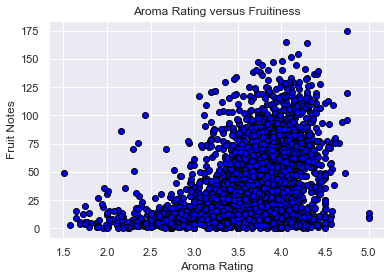

In [13]:
#Is there any correlation between fruit notes and aroma rating? 
x = beer_ratings_df["review_aroma"]
y = beer_ratings_df["Fruits"]
plt.scatter(x, y, marker="o", facecolors="blue", edgecolors="black")
plt.title("Aroma Rating versus Fruitiness")
plt.xlabel("Aroma Rating")
plt.ylabel("Fruit Notes")

In [14]:
#Create a dataframe specific to American IPAs
american_ipa = beer_ratings_df.loc[beer_ratings_df["Style"] == "IPA - American"]
american_ipa

,Name,Style,Brewery,Beer Name (Full),Description,ABV,Min IBU,Max IBU,Astringency,Body,...,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
800,Sculpin,IPA - American,Ballast Point Brewing Company,Ballast Point Brewing Company Ghost Pepper Scu...,Notes:Originally named Northstar IPA. Debuted ...,7.00,50,70,20,34,...,72,92,4,28,3.500000,4.000000,3.500000,2.500000,3.000000,1
801,60 Minute IPA,IPA - American,Dogfish Head Brewery,Dogfish Head Brewery 60 Minute IPA,Notes:60 Minute IPA is continuously hopped -- ...,6.00,50,70,17,26,...,44,75,3,24,3.996768,3.966061,4.006667,4.118990,4.172727,2475
802,Torpedo Extra IPA,IPA - American,Sierra Nevada Brewing Co.,Sierra Nevada Brewing Co. Sierra Nevada Torped...,Notes:From the brewery ... Sierra Nevada Torpe...,7.20,50,70,10,44,...,43,107,6,38,4.019961,4.170527,4.029571,4.113849,4.104485,2029
803,Celebration Fresh Hop IPA,IPA - American,Sierra Nevada Brewing Co.,Sierra Nevada Brewing Co. Sierra Nevada Celebr...,Notes:Fresh Hop Ale; no spices.We first brewed...,6.80,50,70,19,38,...,25,92,5,47,4.082333,4.225167,4.076000,4.190000,4.168667,3000
804,A Little Sumpin' Sumpin' Ale,IPA - American,Lagunitas Brewing Company,Lagunitas Brewing Company A Little Sumpin' Sum...,"Notes:Brewed with 50% wheat malt; Willamette, ...",7.50,50,70,15,32,...,69,100,2,65,4.208235,3.995882,4.031765,4.216471,4.219412,850
805,Jai Alai IPA,IPA - American,Cigar City Brewing,Cigar City Brewing Jai Alai IPA,"Notes:Jai Alai, a game native to the Basque re...",7.50,50,70,21,34,...,73,51,10,33,4.000770,4.121726,4.045455,4.106317,4.115562,649
806,Centennial IPA,IPA - American,Founders Brewing Company,Founders Brewing Company Founders Centennial IPA,Notes:Get ready to bask in the glory of the fr...,7.20,50,70,12,28,...,47,85,4,44,4.087455,4.056272,4.018638,4.134050,4.146237,1395
807,All Day IPA,IPA - American,Founders Brewing Company,Founders Brewing Company Founders All Day IPA,Notes:The beer you’ve been waiting for. Keeps ...,4.70,50,70,16,16,...,30,54,1,25,4.066667,3.766667,3.955556,3.922222,4.100000,45
808,HopDevil,IPA - American,Victory Brewing Company,Victory Brewing Company HopDevil Ale,"Notes:Bold, spicy and menacingly delicious, th...",6.70,50,70,13,27,...,30,89,10,69,3.995656,4.093180,4.019114,4.143788,4.114683,2302
809,Blind Pig,IPA - American,Russian River Brewing Company,Russian River Brewing Company Blind Pig IPA,"Notes:Full-bodied, very hoppy, with citrus, pi...",6.25,50,70,45,37,...,94,140,1,33,4.353199,4.187993,4.160386,4.308940,4.360210,1141


In [15]:
#What is the average rating of American IPAs?
american_ipa["review_overall"].mean()

4.078092236842106

In [16]:
#Average Alcohol by Volume?
american_ipa["ABV"].mean()

6.897368421052632

In [17]:
#Create a dataframe specific to American Pale Ales
american_pa = beer_ratings_df.loc[beer_ratings_df["Style"] == "Pale Ale - American"]
american_pa

,Name,Style,Brewery,Beer Name (Full),Description,ABV,Min IBU,Max IBU,Astringency,Body,...,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
1796,Pale Ale,Pale Ale - American,Sierra Nevada Brewing Co.,Sierra Nevada Brewing Co. Chico Special Pale Ale,"Notes:Our most popular beer, Sierra Nevada Pal...",5.60,25,50,28,34,...,45,96,5,48,4.000000,3.000000,4.000000,4.000000,4.000000,1
1797,Zombie Dust,Pale Ale - American,Three Floyds Brewing Co. & Brewpub,Three Floyds Brewing Co. & Brewpub Zombie Dust,Notes:This intensely hopped and gushing undead...,6.20,25,50,33,47,...,92,115,8,64,4.543257,4.215013,4.258270,4.492366,4.512723,393
1798,Dale's Pale Ale,Pale Ale - American,Oskar Blues Grill & Brew,Oskar Blues Grill & Brew Dale's Pale Ale,Notes:,6.50,25,50,9,29,...,22,58,1,37,3.850762,3.949100,3.878116,3.982341,4.075831,1444
1799,Alpha King,Pale Ale - American,Three Floyds Brewing Co. & Brewpub,Three Floyds Brewing Co. & Brewpub Alpha King ...,error entering this description,6.66,25,50,14,25,...,46,78,6,55,4.253429,4.118550,4.139778,4.328870,4.330176,1531
1800,Pseudo Sue,Pale Ale - American,Toppling Goliath Brewing Company,Toppling Goliath Brewing Company PseudoSue,Notes:This single hop ale showcases the Citra ...,5.80,25,50,38,43,...,120,84,0,23,4.750000,4.000000,4.000000,4.500000,4.500000,2
1801,Daisy Cutter Pale Ale,Pale Ale - American,Half Acre Beer Company,Half Acre Beer Company Daisy Cutter Pale Ale,Notes:Daisy Cutter Pale Ale is one of the firs...,5.20,25,50,28,42,...,82,124,4,61,4.283195,4.123444,4.029046,4.163900,4.295643,482
1802,420 Extra Pale Ale,Pale Ale - American,SweetWater Brewing Company,SweetWater Brewing Company Sweetwater 420 Extr...,Notes:,5.40,25,50,12,25,...,48,69,9,47,3.512241,3.634652,3.603578,3.665725,3.862524,531
1803,Mirror Pond Pale Ale,Pale Ale - American,Deschutes Brewery,Deschutes Brewery Mirror Pond Pale Ale,Notes:Alc. by Vol.: 5.0%IBUs: 40170 calories p...,5.00,25,50,19,27,...,38,88,3,67,3.796943,3.881368,3.804949,3.945415,4.097525,687
1804,Peeper,Pale Ale - American,Maine Beer Company,Maine Beer Company Peeper Ale,"Notes:Our original hoppy American ale. Dry, cl...",5.50,25,50,38,29,...,80,87,14,46,4.127240,4.184588,4.030466,4.112903,4.229391,279
1805,Edward,Pale Ale - American,Hill Farmstead Brewery,Hill Farmstead Brewery Edward Pale Ale,Notes:Edward (1917-2002) is our grandfather; H...,5.20,25,50,21,14,...,89,64,0,27,4.393805,4.115044,4.181416,4.345133,4.433628,113


In [19]:
#What is the average rating of American Pale Ales?
american_pa["review_overall"].mean()

4.085476320000001

In [20]:
#Average Alcohol by Volume?
american_pa["ABV"].mean()

5.570400000000001

In [ ]:
plt.savefig("")
plt.show()